# Cryptocurrency Web Scraper
This project utilizes Python to scrape and extract data on the top 10 cryptocurrencies from CoinMarketCap on a weekly basis, enabling analysis of trends and patterns in cryptocurrency performance and the development of predictive models for future market trends.

# Contents  
1. [Extraction](#1)     
    1. [Initializing Crypto Data Lists and Creating DataFrame](#1.1) 
    2. [Function: Scrape Date List from CoinMarketCap](#1.2) 
    3. [Function: Scrape Cryptocurrency Data for a Specific Date](#1.3) 
    4. [Scraping Cryptocurrency Data for Multiple Dates](#1.4) 
2. [Transformation](#3) 
    1. [Data Cleaning and Formatting](#2.1) 
    2. [Missing Value Imputation and Reverse Normalization](#2.2) 
3. [Loading](#3)
4. [Data Analysis](#4)
    1. [Time Series Analysis](#4.1) 
    2. [Correlation Analysis](#4.2) 
    3. [Trend Analysis](#4.3) 
    4. [Volatility Analysis](#4.4) 
    5. [Comparative Analysis](#4.5) 
    6. [Predictive Analysis](#4.6) 


In [112]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

<a id="1"></a>
# 1. Extraction

<a id="1.1"></a>
## 1.1. Initializing Crypto Data Lists and Creating DataFrame

In [113]:
crypto_date_list = []
crypto_name_list = []
crypto_symbol_list = []
crypto_market_cap_list = []
crypto_price_list = []
crypto_circulating_supply_list = []
crypto_voulume_24hr_list = []
crypto_pct_1hr_list = []
crypto_pct_24hr_list = []
crypto_pct_7day_list = []

df = pd.DataFrame()

<a id="1.2"></a>
## 1.2. Function: Scrape Date List from CoinMarketCap

In [114]:
scrape_date_list = []

def scrape_date():
    url = 'https://coinmarketcap.com/historical/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    a_tags = soup.find_all('a', class_='historical-link cmc-link')
    for tag in a_tags:
        href = tag.get('href')
        scrape_date_list.append(href)

scrape_date()
print('There are ' + str(len(scrape_date_list)) + ' dates(Sundays) available for scraping from CoinMarketCap historical data.')

There are 534 dates(Sundays) available for scraping from CoinMarketCap historical data.


<a id="1.3"></a>
## 1.3. Function: Scrape Cryptocurrency Data for a Specific Date

In [115]:
def scrape_data(date):
    url = 'https://coinmarketcap.com' + date
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    tr = soup.find_all('tr', attrs={'class': 'cmc-table-row'})
    count = 0
    for row in tr:
        if count == 10:
            break
        count += 1

        try:
            crypto_date = date
        except AttributeError:
            crypto_date = None

        try:
            name_column = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sticky cmc-table__cell--sortable cmc-table__cell--left cmc-table__cell--sort-by__name'})
            crypto_name = name_column.find('a', attrs={'class': 'cmc-table__column-name--name cmc-link'}).text.strip()
        except AttributeError:
            crypto_name = None

        try:
            crypto_symbol = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--left cmc-table__cell--sort-by__symbol'}).text.strip()
        except AttributeError:
            crypto_symbol = None

        try:
            crypto_market_cap = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__market-cap'}).text.strip()
        except AttributeError:
            crypto_market_cap = None

        try:
            crypto_price = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__price'}).text.strip()
        except AttributeError:
            crypto_price = None

        try:
            crypto_circulating_supply = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__circulating-supply'}).text.strip().split(' ')[0]
        except AttributeError:
            crypto_circulating_supply = None

        try:
            crypto_voulume_24hr_td = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__volume-24-h'})
            crypto_voulume_24hr = crypto_voulume_24hr_td.find('a', attrs={'class': 'cmc-link'}).text.strip()
        except AttributeError:
            crypto_voulume_24hr = None

        try:
            crypto_pct_1hr = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-1-h'}).text.strip()
        except AttributeError:
            crypto_pct_1hr = None

        try:
            crypto_pct_24hr = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-24-h'}).text.strip()
        except AttributeError:
            crypto_pct_24hr = None

        try:
            crypto_pct_7day = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-7-d'}).text.strip()
        except AttributeError:
            crypto_pct_7day = None

        crypto_date_list.append(crypto_date)
        crypto_name_list.append(crypto_name)
        crypto_symbol_list.append(crypto_symbol)
        crypto_market_cap_list.append(crypto_market_cap)
        crypto_price_list.append(crypto_price)
        crypto_circulating_supply_list.append(crypto_circulating_supply)
        crypto_voulume_24hr_list.append(crypto_voulume_24hr)
        crypto_pct_1hr_list.append(crypto_pct_1hr)
        crypto_pct_24hr_list.append(crypto_pct_24hr)
        crypto_pct_7day_list.append(crypto_pct_7day)

<a id="1.4"></a>
## 1.4 Scraping Cryptocurrency Data for Multiple Dates

In [116]:
from datetime import datetime

date_format = "%Y%m%d"

# Split and convert the start date and end date
start_date = datetime.strptime(scrape_date_list[0].split('/')[-2], date_format).strftime('%Y-%m-%d')
end_date = datetime.strptime(scrape_date_list[-1].split('/')[-2], date_format).strftime('%Y-%m-%d')
print('There are ' + str(len(scrape_date_list)) + ' dates(Sundays) between ' + start_date + ' and ' + end_date)


for i in range(len(scrape_date_list)):
    scrape_data(scrape_date_list[i])
    print("completed: " + str(i+1) + " out of " + str(len(scrape_date_list)))

There are 534 dates(Sundays) between 2013-04-28 and 2023-07-16
completed: 1 out of 534
completed: 2 out of 534
completed: 3 out of 534
completed: 4 out of 534
completed: 5 out of 534
completed: 6 out of 534
completed: 7 out of 534
completed: 8 out of 534
completed: 9 out of 534
completed: 10 out of 534
completed: 11 out of 534
completed: 12 out of 534
completed: 13 out of 534
completed: 14 out of 534
completed: 15 out of 534
completed: 16 out of 534
completed: 17 out of 534
completed: 18 out of 534
completed: 19 out of 534
completed: 20 out of 534
completed: 21 out of 534
completed: 22 out of 534
completed: 23 out of 534
completed: 24 out of 534
completed: 25 out of 534
completed: 26 out of 534
completed: 27 out of 534
completed: 28 out of 534
completed: 29 out of 534
completed: 30 out of 534
completed: 31 out of 534
completed: 32 out of 534
completed: 33 out of 534
completed: 34 out of 534
completed: 35 out of 534
completed: 36 out of 534
completed: 37 out of 534
completed: 38 out of 

In [117]:
df['Date'] = crypto_date_list
df['Name'] = crypto_name_list
df['Symbol'] = crypto_symbol_list
df['Market Cap'] = crypto_market_cap_list
df['Price'] = crypto_price_list
df['Circulating Supply'] = crypto_circulating_supply_list
df['Volume (24hr)'] = crypto_voulume_24hr_list
df['% 1h'] = crypto_pct_1hr_list
df['% 24h'] = crypto_pct_24hr_list
df['% 7d'] = crypto_pct_7day_list

df

,Date,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
0,/historical/20130505/,Bitcoin,BTC,"$1,288,693,216.22",$115.91,"11,118,050",None,0.43%,2.97%,-13.81%
1,/historical/20130505/,Litecoin,LTC,"$62,298,217.32",$3.5909,"17,348,954",None,0.10%,2.87%,-16.72%
2,/historical/20130505/,Namecoin,NMC,"$6,290,543.05",$1.1510,"5,465,350",None,-1.19%,8.91%,1.64%
3,/historical/20130505/,Peercoin,PPC,"$5,718,446.46",$0.3037,"18,830,240",None,0.31%,2.61%,-22.20%
4,/historical/20130505/,Feathercoin,FTC,"$2,017,436.23",$0.313,"6,444,650",None,-12.81%,-29.71%,--
...,...,...,...,...,...,...,...,...,...,...
5315,/historical/20230709/,XRP,XRP,"$24,483,751,871.29",$0.4686,"52,254,289,650","$324,938,269.20",-0.14%,-0.44%,-3.29%
5316,/historical/20230709/,Cardano,ADA,"$9,951,076,090.56",$0.2846,"34,966,190,615","$182,219,305.89",-0.25%,-2.08%,-2.56%
5317,/historical/20230709/,Dogecoin,DOGE,"$9,167,900,895.98",$0.06543,"140,107,106,384","$146,485,995.04",-0.26%,-0.50%,-3.83%
5318,/historical/20230709/,Solana,SOL,"$8,592,737,596.61",$21.35,"402,488,913","$405,174,805.99",-0.31%,-2.33%,9.74%


### DataFrame Information Before Transformation

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                5320 non-null   object
 1   Name                5320 non-null   object
 2   Symbol              5320 non-null   object
 3   Market Cap          5320 non-null   object
 4   Price               5320 non-null   object
 5   Circulating Supply  5320 non-null   object
 6   Volume (24hr)       4980 non-null   object
 7   % 1h                5320 non-null   object
 8   % 24h               5320 non-null   object
 9   % 7d                5320 non-null   object
dtypes: object(10)
memory usage: 415.8+ KB


** Please note that there is no available data for April 28, 2013, as it marks the beginning of the cryptocurrency market.

<a id="2"></a>
# 2. Transformation

<a id="2.1"></a>
## 2.1. Data Cleaning and Formatting

In [119]:
# Extract the date component from the 'Date' column and convert it to a datetime data type
df['Date'] = pd.to_datetime(df['Date'].str.split('/').str[-2], format='%Y%m%d')

# Replace the dollar signs ($) and commas (,) from the 'Market Cap' and 'Price' columns
df['Market Cap'] = df['Market Cap'].str.replace('[$,]', '', regex=True)
df['Price'] = df['Price'].str.replace('[$,]', '', regex=True)

# Replace the commas (,) from the 'Circulating Supply' column
df['Circulating Supply'] = df['Circulating Supply'].str.replace(',', '')

# Replace the dollar signs ($) and commas (,) from the 'Volume (24hr)' columns
df['Volume (24hr)'] = df['Volume (24hr)'].str.replace('[$,]', '', regex=True)

# Replace the unchange sign (--), the smaller sign (<), the larger sign (>) and percentage sign (%) from the '% 1h', '% 24h', and '% 7d' columns
df['% 1h'] = df['% 1h'].str.replace('--', '0').str.lstrip('>').str.lstrip('<').str.rstrip('%')
df['% 24h'] = df['% 24h'].str.replace('--', '0').str.lstrip('>').str.lstrip('<').str.rstrip('%')
df['% 7d'] = df['% 7d'].str.replace('--', '0').str.lstrip('>').str.lstrip('<').str.rstrip('%')

# Convert the numeric columns to appropriate data types, replacing invalid values with NaN
numeric_cols = ['Market Cap', 'Price', 'Circulating Supply', 'Volume (24hr)', '% 1h', '% 24h', '% 7d']
df[numeric_cols] = df[numeric_cols].apply(lambda x: pd.to_numeric(x))

# Handle specific case of "<0.01" by replacing it with a small non-zero value, e.g., 0.005
df.loc[df['% 1h'] < 0, '% 1h'] = 0.005

# Set the display format for float and integer values
pd.options.display.float_format = '{:.2f}'.format

# Display the updated DataFrame
df


,Date,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
0,2013-05-05,Bitcoin,BTC,1288693216.22,115.91,11118050,NaN,0.43,2.97,-13.81
1,2013-05-05,Litecoin,LTC,62298217.32,3.59,17348954,NaN,0.10,2.87,-16.72
2,2013-05-05,Namecoin,NMC,6290543.05,1.15,5465350,NaN,0.01,8.91,1.64
3,2013-05-05,Peercoin,PPC,5718446.46,0.30,18830240,NaN,0.31,2.61,-22.20
4,2013-05-05,Feathercoin,FTC,2017436.23,0.31,6444650,NaN,0.01,-29.71,0.00
...,...,...,...,...,...,...,...,...,...,...
5315,2023-07-09,XRP,XRP,24483751871.29,0.47,52254289650,324938269.20,0.01,-0.44,-3.29
5316,2023-07-09,Cardano,ADA,9951076090.56,0.28,34966190615,182219305.89,0.01,-2.08,-2.56
5317,2023-07-09,Dogecoin,DOGE,9167900895.98,0.07,140107106384,146485995.04,0.01,-0.50,-3.83
5318,2023-07-09,Solana,SOL,8592737596.61,21.35,402488913,405174805.99,0.01,-2.33,9.74


<a id="2.2"></a>
## 2.2. Missing Value Imputation and Reverse Normalization

To address missing values in the "Volume (24hr)" column, a machine learning algorithm such as K-Nearest Neighbors (KNN) can be employed. KNN imputation is a more accurate method compared to mean or median imputation, although it requires more computational resources due to its algorithmic complexity. Since there is no available data prior to December 22, 2013, this approach can help predict and fill in the missing values effectively.

In [120]:
# Check for missing data
df.isnull().sum()

Date                    0
Name                    0
Symbol                  0
Market Cap              0
Price                   0
Circulating Supply      0
Volume (24hr)         340
% 1h                    0
% 24h                   0
% 7d                    0
dtype: int64

In [121]:
# Select numerical columns for imputation
numeric_cols = ['Market Cap', 'Price', 'Circulating Supply', '% 1h', '% 24h', '% 7d', 'Volume (24hr)']

# Normalization
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# KNN Imputation
imputer = KNNImputer(n_neighbors=3)
df_imputed = df_normalized.copy()
df_imputed[numeric_cols] = imputer.fit_transform(df_normalized[numeric_cols])

# Reverse normalization
df_imputed[numeric_cols] = scaler.inverse_transform(df_imputed[numeric_cols])

df = df_imputed.copy()
df


,Date,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
0,2013-05-05,Bitcoin,BTC,1288693216.22,115.91,11118050.00,78443798.88,0.43,2.97,-13.81
1,2013-05-05,Litecoin,LTC,62298217.32,3.59,17348954.00,2149449.54,0.10,2.87,-16.72
2,2013-05-05,Namecoin,NMC,6290543.05,1.15,5465350.00,9752431.10,0.01,8.91,1.64
3,2013-05-05,Peercoin,PPC,5718446.46,0.30,18830240.00,457357.38,0.31,2.61,-22.20
4,2013-05-05,Feathercoin,FTC,2017436.23,0.31,6444650.00,72646.42,0.01,-29.71,0.00
...,...,...,...,...,...,...,...,...,...,...
5315,2023-07-09,XRP,XRP,24483751871.29,0.47,52254289650.00,324938269.20,0.01,-0.44,-3.29
5316,2023-07-09,Cardano,ADA,9951076090.56,0.28,34966190615.00,182219305.89,0.01,-2.08,-2.56
5317,2023-07-09,Dogecoin,DOGE,9167900895.98,0.07,140107106384.00,146485995.04,0.01,-0.50,-3.83
5318,2023-07-09,Solana,SOL,8592737596.61,21.35,402488913.00,405174805.99,0.01,-2.33,9.74


### DataFrame Information After Transformation

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5320 non-null   datetime64[ns]
 1   Name                5320 non-null   object        
 2   Symbol              5320 non-null   object        
 3   Market Cap          5320 non-null   float64       
 4   Price               5320 non-null   float64       
 5   Circulating Supply  5320 non-null   float64       
 6   Volume (24hr)       5320 non-null   float64       
 7   % 1h                5320 non-null   float64       
 8   % 24h               5320 non-null   float64       
 9   % 7d                5320 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 415.8+ KB


** Please note that there is no available data for April 28, 2013, as it marks the beginning of the cryptocurrency market.

** Please note that that there is no available data before December 22, 2013, for the "Volume (24hr)" column.

<a id="3"></a>
# 3. Loading

In [123]:
# Save the DataFrame as a CSV file
df.to_csv('output.csv', index=False)

<a id="4"></a>
# 4. Data Analysis

In [124]:
df = pd.read_csv('output.csv')

<a id="4.1"></a>
## 4.1 Time Series Analysis
It focuses on studying changing data over time, particularly in the context of Bitcoin. It involves examining patterns, trends, and relationships in Bitcoin's price, market cap, and trading volume. The goal is to uncover insights into Bitcoin's past performance and inform future predictions and decisions.

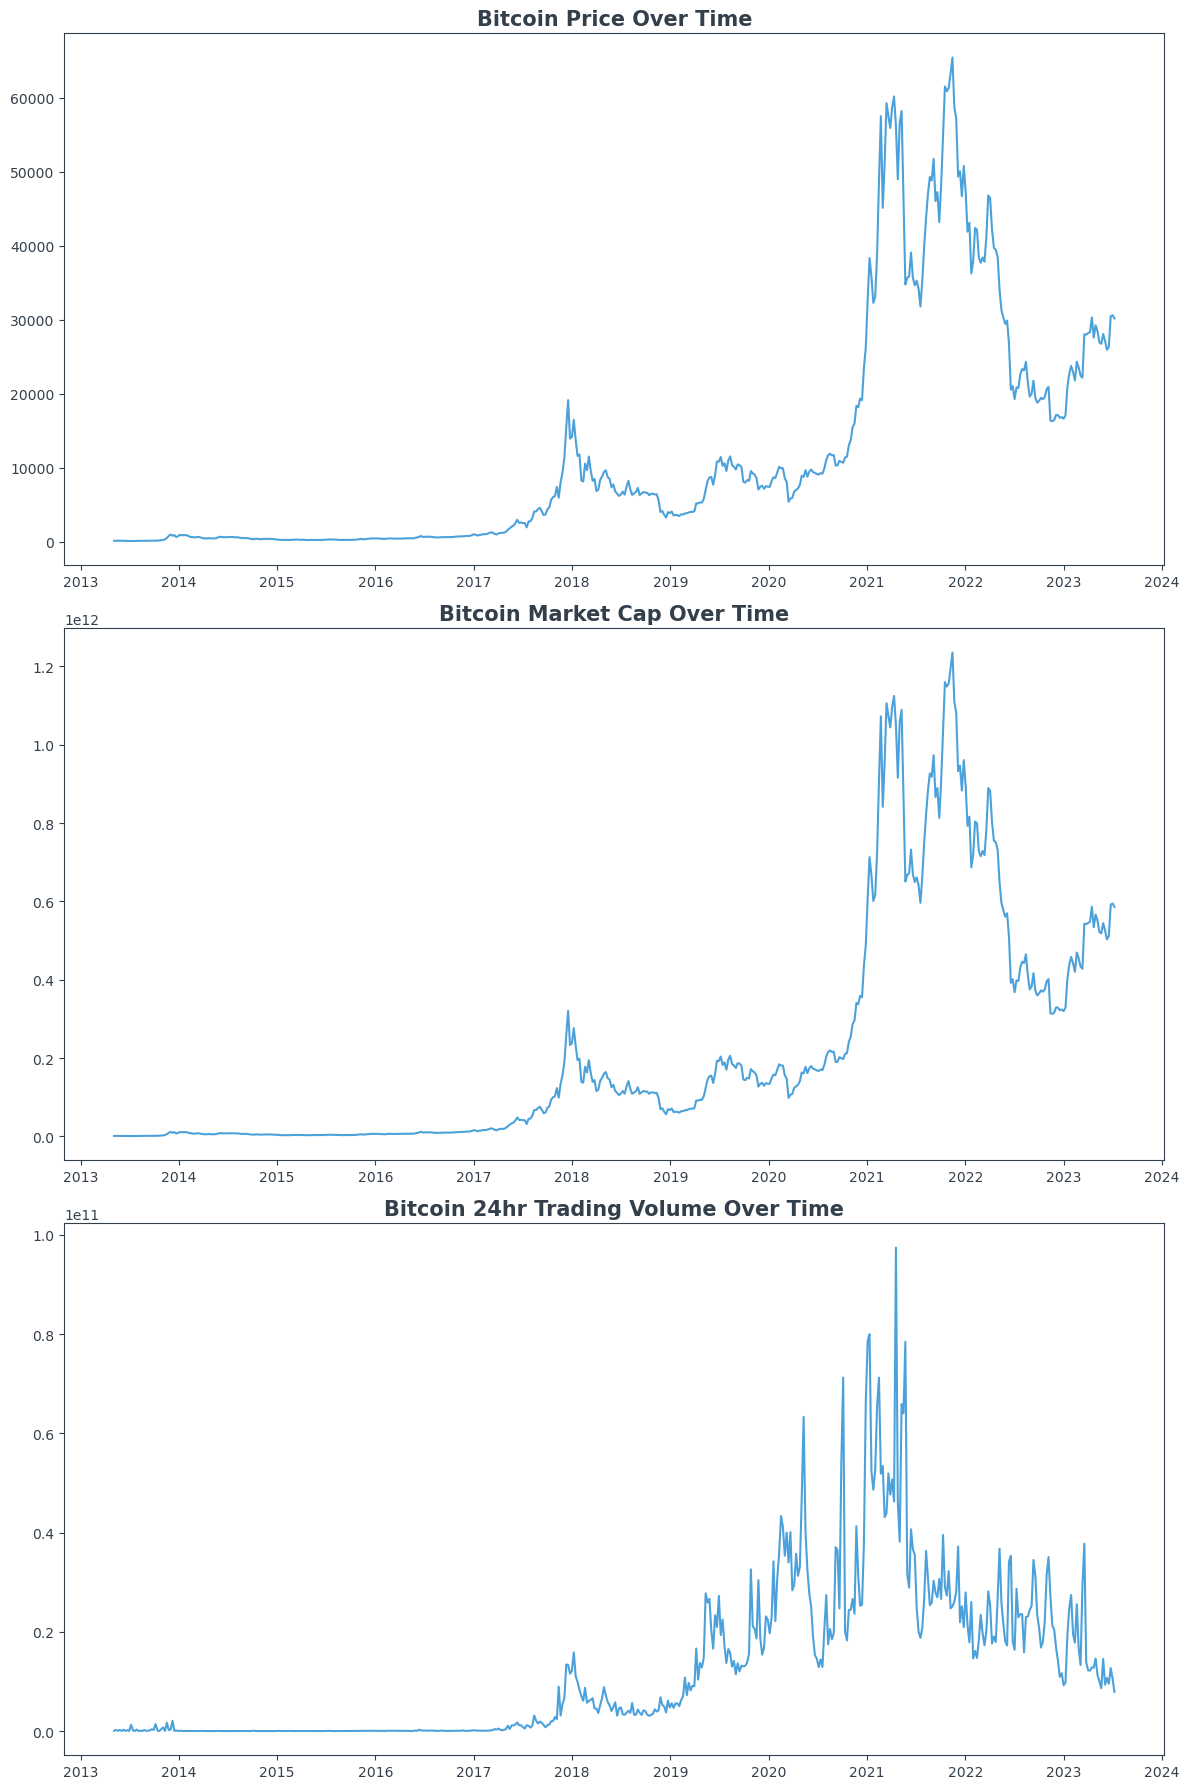

In [125]:
import matplotlib.pyplot as plt

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for Bitcoin
btc_data = df[df['Symbol'] == 'BTC']

# Set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

import matplotlib.dates as mdates

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot 'Price' over time
axs[0].plot(btc_data['Date'], btc_data['Price'], color='#007acc', alpha=0.7)
axs[0].set_title('Bitcoin Price Over Time', fontsize=15, fontweight='black', color = '#333F4B')

# Plot 'Market Cap' over time
axs[1].plot(btc_data['Date'], btc_data['Market Cap'], color='#007acc', alpha=0.7)
axs[1].set_title('Bitcoin Market Cap Over Time', fontsize=15, fontweight='black', color = '#333F4B')

# Plot 'Volume (24hr)' over time
axs[2].plot(btc_data['Date'], btc_data['Volume (24hr)'], color='#007acc', alpha=0.7)
axs[2].set_title('Bitcoin 24hr Trading Volume Over Time', fontsize=15, fontweight='black', color = '#333F4B')

# Formatting dates
date_format = mdates.DateFormatter('%Y')
for ax in axs:
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(mdates.YearLocator())

plt.tight_layout()
plt.show()


<a id="4.2"></a>
## 4.2 Correlation Analysis
It is a statistical method that measures relationships between variables. By computing a correlation matrix, it identifies the strength and direction of associations between financial metrics. This analysis reveals patterns and dependencies, providing insights into the interrelationships of the variables.

In [126]:
# Compute the correlation matrix
correlation_matrix = df[['Market Cap', 'Price', 'Circulating Supply', 'Volume (24hr)', '% 1h', '% 24h', '% 7d']].corr()

# Display the correlation matrix
correlation_matrix


,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
Market Cap,1.00,0.94,-0.00,0.42,-0.03,-0.01,-0.01
Price,0.94,1.00,-0.00,0.36,-0.02,-0.01,-0.01
Circulating Supply,-0.00,-0.00,1.00,0.00,0.01,0.00,0.01
Volume (24hr),0.42,0.36,0.00,1.00,-0.06,-0.01,-0.01
% 1h,-0.03,-0.02,0.01,-0.06,1.00,0.21,0.06
% 24h,-0.01,-0.01,0.00,-0.01,0.21,1.00,0.10
% 7d,-0.01,-0.01,0.01,-0.01,0.06,0.10,1.00


- 'Market Cap' and 'Price' have a strong positive correlation, which suggests that cryptocurrencies with a higher market cap tend to have higher prices.

- 'Market Cap' and 'Volume (24hr)' have a moderate positive correlation, implying that cryptocurrencies with a larger market cap generally have higher trading volume.

- '% 1h', '% 24h', and '% 7d' (percentage changes in price) do not have strong correlations with the other variables, suggesting that short-term price changes may be influenced by factors not included in this dataset.

<a id="4.3"></a>
## 4.3 Trend Analysis
It involves studying the changes in data over time. In this example, growth rates for 'Price' and 'Market Cap' are calculated for different cryptocurrencies. Positive values indicate growth, while negative values indicate decline. By examining these growth rates, trends can be identified, revealing which cryptocurrencies experienced significant changes in price and market capitalization over the analyzed period.

In [127]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by 'Name' and 'Date'
data_sorted = df.sort_values(by=['Name', 'Date'])

# Calculate the growth rate for 'Price', 'Market Cap', and 'Volume (24hr)' for each cryptocurrency
growth_rates = data_sorted.groupby('Name').apply(lambda x: ((x[['Price', 'Market Cap']].iloc[-1] - x[['Price', 'Market Cap']].iloc[0]) / x[['Price', 'Market Cap']].iloc[0]) * 100)

# Display the growth rates
growth_rates


,Price,Market Cap
Name,,
Aphroditecoin,0.00,0.00
Augur,140.77,140.80
Auroracoin,-96.54,-96.50
Avalanche,-33.50,-26.55
BNB,-53.01,-56.09
...,...,...
Waves,1411.48,1411.28
WorldCoin,2521.21,3774.90
XCurrency,0.00,0.00


- Aphroditecoin, XCurrency, and Yacoin show no significant change in both 'Price' and 'Market Cap' with growth rates of 0.00.
- Augur demonstrates notable growth with positive growth rates of 140.77% for 'Price' and 140.80% for 'Market Cap'.
- Auroracoin, Avalanche, and BNB (Binance Coin) exhibit negative growth rates, indicating declines in both 'Price' and 'Market Cap'.
- Other cryptocurrencies like Waves, WorldCoin, and XRP show positive growth rates, indicating significant increases in both 'Price' and 'Market Cap'.


<a id="4.4"></a>
## 4.4 Volatility Analysis
It quantifies price fluctuations in cryptocurrencies by calculating the standard deviation of their percentage price changes. It helps assess the stability and risk associated with each cryptocurrency.

In [128]:
# Calculate the percentage change in 'Price' for each row
data_sorted['Price Change'] = data_sorted.groupby('Name')['Price'].pct_change()

# Calculate the volatility as the standard deviation of the percentage change in 'Price' for each cryptocurrency
volatility = data_sorted.groupby('Name')['Price Change'].std()

volatility

Name
Aphroditecoin    NaN
Augur           0.16
Auroracoin      0.41
Avalanche       0.14
BNB             0.08
                ... 
Waves           7.30
WorldCoin       2.25
XCurrency        NaN
XRP             0.35
Yacoin           NaN
Name: Price Change, Length: 85, dtype: float64

- Cryptocurrencies like Aphroditecoin, XCurrency, and Yacoin have NaN (Not a Number) values for volatility, indicating insufficient data or a lack of price changes to calculate volatility.

- Augur and Auroracoin exhibit relatively higher volatility scores of 0.16 and 0.41, respectively. This suggests that their prices have experienced more significant fluctuations compared to other cryptocurrencies in the dataset.

- Avalanche and BNB (Binance Coin) have lower volatility scores of 0.14 and 0.08, respectively, indicating relatively more stable price movements.

- The volatility scores of other cryptocurrencies in the dataset may vary, indicating different levels of price stability or volatility.

<a id="4.5"></a>
## 4.5 Comparative Analysis
It involves comparing key data points such as 'Price', 'Market Cap', and 'Volume (24hr)' for different cryptocurrencies. The analysis sorts the data, selects the most recent information for each cryptocurrency, and displays it for comparison. This allows for evaluating the relative performance and market activity of various cryptocurrencies.

In [129]:
# Get the most recent data for each cryptocurrency
most_recent_data = data_sorted.groupby('Name').last()

# Display the 'Price', 'Market Cap', and 'Volume (24hr)' for each cryptocurrency
comparative_data = most_recent_data[['Price', 'Market Cap', 'Volume (24hr)']]

comparative_data

,Price,Market Cap,Volume (24hr)
Name,,,
Aphroditecoin,3.85,86892531.75,45328.90
Augur,17.00,187021274.57,874532.06
Auroracoin,0.84,9051803.63,15410.31
Avalanche,71.60,19233384465.34,320340265.86
BNB,234.23,36504451694.05,289327973.09
...,...,...,...
Waves,5.35,534606266.02,4447074.00
WorldCoin,0.52,19546847.28,123416.81
XCurrency,1.81,9965987.76,627465.00


- Aphroditecoin has a price of 3.85, a market cap of 86,892,531.75, and a trading volume of 45,328.90.

- Augur has a higher price of 17.00, a larger market cap of 187,021,274.57, and a higher trading volume of 874,532.06.

- Auroracoin has a relatively lower price of 0.84, a smaller market cap of 9,051,803.63, and a trading volume of 15,410.31.

<a id="4.6"></a>
## 4.6 Predictive Analysis
It utilizes historical data to forecast future trends. In this example, a Long Short-Term Memory (LSTM) model is trained on Bitcoin price data. The model is used to make predictions, and the results are plotted alongside the original data. This analysis provides insights into potential future price movements, but it's important to note that predictions may not be entirely accurate due to inherent uncertainties in the market.

Epoch 1/50
13/13 [==============================] - 2s 9ms/step - loss: 0.0378
Epoch 2/50
13/13 [==============================] - 0s 10ms/step - loss: 0.0149
Epoch 3/50
13/13 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 4/50
13/13 [==============================] - 0s 8ms/step - loss: 0.0062
Epoch 5/50
13/13 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 6/50
13/13 [==============================] - 0s 9ms/step - loss: 0.0042
Epoch 7/50
13/13 [==============================] - 0s 8ms/step - loss: 0.0038
Epoch 8/50
13/13 [==============================] - 0s 9ms/step - loss: 0.0036
Epoch 9/50
13/13 [==============================] - 0s 9ms/step - loss: 0.0031
Epoch 10/50
13/13 [==============================] - 0s 9ms/step - loss: 0.0025
Epoch 11/50
13/13 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 12/50
13/13 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 13/50
13/13 [=============================

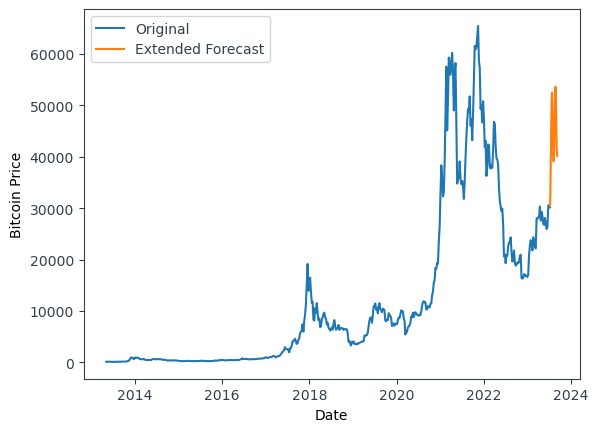

In [130]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Filter the data for Bitcoin
bitcoin_data = data_sorted[data_sorted['Name'] == 'Bitcoin']

# Extract the 'Price' column
price_data = bitcoin_data['Price'].values

# Normalize the data
scaler = MinMaxScaler()
price_data_normalized = scaler.fit_transform(price_data.reshape(-1, 1))

# Define the number of previous time steps to consider for the LSTM model
n_steps = 30

# Create input features and target variable
X = []
y = []
for i in range(n_steps, len(price_data_normalized)):
    X.append(price_data_normalized[i-n_steps:i])
    y.append(price_data_normalized[i])
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
last_sequence = X_test[-1]  # Get the last sequence from the testing set
forecast = []
for _ in range(60):  # Change the range to 60 for predicting 60 days
    next_prediction = model.predict(last_sequence.reshape(1, n_steps, 1))
    forecast.append(next_prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], next_prediction[0, 0])

# Inverse normalize the predictions
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Generate the future dates for the forecast
last_date = bitcoin_data['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60)  # Change the periods to 60

# Plot the original data and the extended forecast
plt.plot(bitcoin_data['Date'], price_data, label='Original')
plt.plot(future_dates, forecast, label='Extended Forecast')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()